Importing Dataset

In [1]:
import pandas as pd
# dfUS = pd.read_csv("dataset/US_youtube_trending_data.csv")
dfIN = pd.read_csv("dataset/IN_youtube_trending_data.csv")
# dfCA = pd.read_csv("dataset/CA_youtube_trending_data.csv")
# dfJP = pd.read_csv("dataset/JP_youtube_trending_data.csv")
# dfRU = pd.read_csv("dataset/RU_youtube_trending_data.csv")


In [2]:
dfIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223502 entries, 0 to 223501
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           223502 non-null  object
 1   title              223502 non-null  object
 2   publishedAt        223502 non-null  object
 3   channelId          223502 non-null  object
 4   channelTitle       223501 non-null  object
 5   categoryId         223502 non-null  int64 
 6   trending_date      223502 non-null  object
 7   tags               223502 non-null  object
 8   view_count         223502 non-null  int64 
 9   likes              223502 non-null  int64 
 10  dislikes           223502 non-null  int64 
 11  comment_count      223502 non-null  int64 
 12  thumbnail_link     223502 non-null  object
 13  comments_disabled  223502 non-null  bool  
 14  ratings_disabled   223502 non-null  bool  
 15  description        205063 non-null  object
dtypes: bool(2), int64(5)

In [3]:
dfIN.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...


In [4]:
dfIN.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,223502.000000,2.235020e+05,2.235020e+05,2.235020e+05,2.235020e+05
mean,20.845192,2.885734e+06,1.462197e+05,2.623205e+03,8.746049e+03
std,6.049007,7.077114e+06,4.044621e+05,7.633705e+04,7.407852e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,3.992128e+05,1.332800e+04,0.000000e+00,3.640000e+02
50%,24.000000,9.917075e+05,4.016300e+04,0.000000e+00,1.190000e+03
75%,24.000000,2.526285e+06,1.237568e+05,9.550000e+02,4.180750e+03
max,29.000000,2.644074e+08,1.611524e+07,1.234147e+07,6.738565e+06


Importing necessary libraries

In [5]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from collections import Counter
import datetime
import json
import squarify
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
import wordcloud

Top 20 most viewed channels

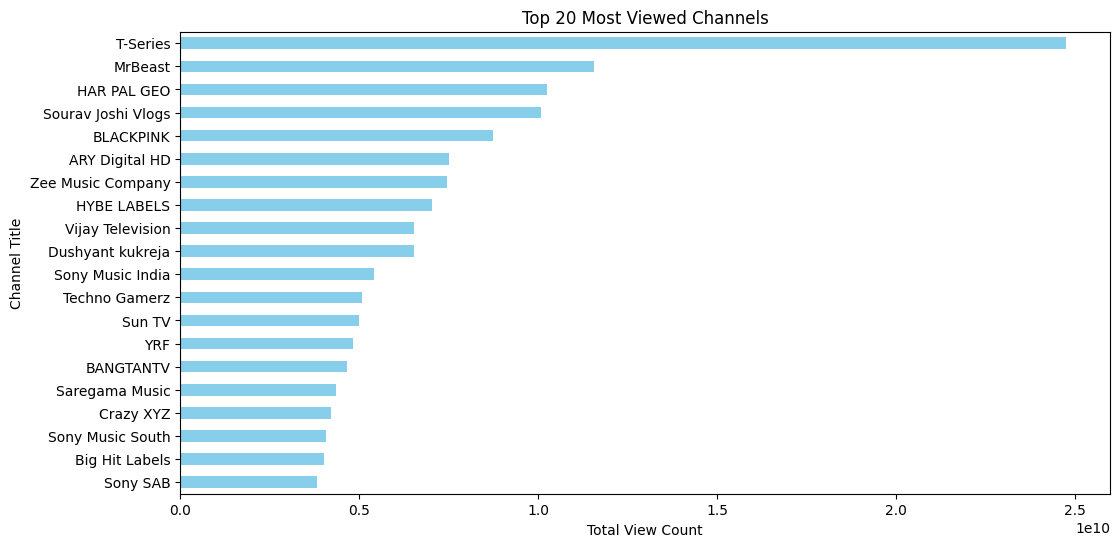

In [6]:
channel_views = dfIN.groupby('channelTitle')['view_count'].sum()
channel_views = channel_views.sort_values(ascending=False)
N = 20  
top_channels = channel_views[:N]
plt.figure(figsize=(12, 6))
top_channels.plot(kind='barh', color='skyblue')
plt.xlabel('Total View Count')
plt.ylabel('Channel Title')
plt.title(f'Top {N} Most Viewed Channels')
plt.gca().invert_yaxis()  
plt.show()

In [7]:
dfIN['publishedAt1'] = pd.to_datetime(dfIN['publishedAt'])
dfIN['trending_date1'] = pd.to_datetime(dfIN['trending_date'])

Most viewed channel by Year

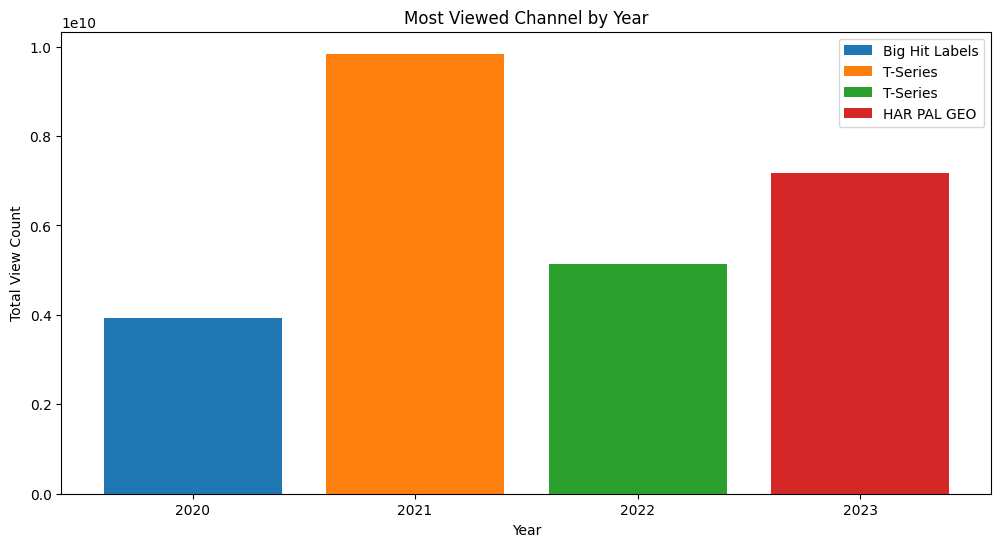

In [8]:
dfIN['trending_date1'] = pd.to_datetime(dfIN['trending_date1'], format='%y.%d.%m')
dfIN['trending_year'] = dfIN['trending_date1'].dt.year
channel_views_by_year = dfIN.groupby(['trending_year', 'channelTitle'])['view_count'].sum().reset_index()
most_viewed_channel_by_year = channel_views_by_year.loc[channel_views_by_year.groupby('trending_year')['view_count'].idxmax()]
plt.figure(figsize=(12, 6))
for year, group in most_viewed_channel_by_year.groupby('trending_year'):
    plt.bar(str(year), group['view_count'], label=group['channelTitle'].values[0])

plt.xlabel('Year')
plt.ylabel('Total View Count')
plt.title('Most Viewed Channel by Year')
plt.legend(loc='best')
plt.show()

Category ID mapping

In [9]:
#We need to import json so that we can use its contents.

with open("dataset/IN_category_id.json") as f: categoryID = json.load(f)
categoryID, l_c = categoryID['items'], len(categoryID['items'])
ID_to_Category = dict(zip([int(categoryID[i]['id']) for i in range(l_c)],
                          [categoryID[i]['snippet']['title'] for i in range(l_c)]))

In [10]:
ID_to_Category[29] = 'Nonprofits & Activism'
ID_to_Category

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers',
 29: 'Nonprofits & Activism'}

In [11]:
ID_to_Category.keys()

dict_keys([1, 2, 10, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 29])

In [12]:
dfIN['categoryId'] = dfIN['categoryId'].apply(lambda x: ID_to_Category[x] )

Data Instancing

Both the trending_date and publishedAt columns have dates, but in different format. Publish_time includes the time of publication and date, while trending_date only have the date. Since we don't have the time the video started trending, we cannot compare it to the publish time. In the end, we will clean the data such that both columns include datatime.date objects

In [13]:
def clean_trending_date(date):
    y,m,d = date.split('T')[0].split('-')
    return datetime.date(int(y), int(m), int(d))

def clean_publish_time(time):
    y,m,d = time.split('T')[0].split('-')
    return datetime.date(int(y), int(m), int(d))

In [14]:
dfIN['trending_date'] = dfIN['trending_date'].apply(clean_trending_date)
dfIN['publishedAt'] = dfIN['publishedAt'].apply(clean_publish_time)

Tag Splitting

Now lets clean up the tags column by separating tags into a list instead of one long string.

In [15]:
def clean_tags(tag):
    if tag == '[none]': return []
    return tag.lower().replace('"','').split('|')

In [16]:
dfIN['tags'] = dfIN['tags'].apply(clean_tags)

Natural Language processing for Title

This time we will clean the video title and keep only the nececary words. So that, we can better analys certain keywords being used in the titles.

In [18]:
def clean_titles(title):
    tokens = title.lower().split()
    cleaned = []
    sw = set(stopwords.words('english'))
    for token in tokens:
        if token.startswith('$') or token.isnumeric() or not token.isalnum() or token in sw:  # Remove money amount, non-alphanumeric tokens, or stopwords
            continue
        else:
            cleaned.append(token)
    return ' '.join(cleaned)

dfIN['title_cl'] = dfIN['title'].apply(clean_titles)

In [59]:
dfIN['title_cl']

0         sadak official trailer sanjay pooja alia adity...
1         kya baat aa karan aujla tania sukh sanghera de...
2                                  diljit clash music video
3         dil ko maine di kasam video amaal asim bhushan...
4          baarish payal ben mohsin shivangi joshi new song
                                ...                        
223497    nischay ko aadhi raat mein amritsari kulche khane
223498                                     renjusha actress
223499        taarak mehta ka ooltah chashmah ep nov teaser
223500    lucknow aate hi siyapaa ho gaya veg ki jagah n...
223501    part leo lokesh kanagaraj interview sudhir sri...
Name: title_cl, Length: 223502, dtype: object

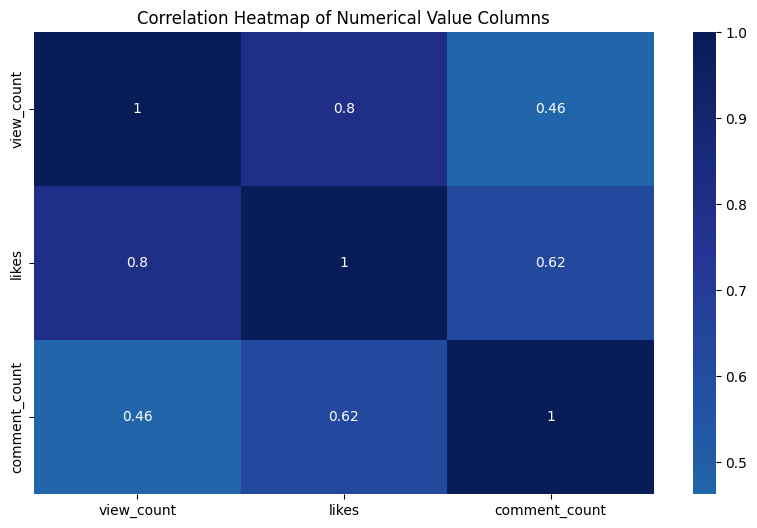

In [20]:
# Select numerical columns
numerical_columns = ['view_count', 'likes', 'comment_count']

# Calculate correlation matrix
correlation_matrix = dfIN[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', center=0)
plt.title('Correlation Heatmap of Numerical Value Columns')
plt.show()

Title Word Choice

Now that we have nicely cleaned our data, we will start analysing our data. We will start from what words are mostly used in video titles by counting how many the same words has been used and folow on after that first lets find them.

In [68]:
cnt = Counter()

# Finding the occurence of words in video titles
for title in dfIN['title_cl']:
    for token in title.split():
        cnt[token] += 1

# Finding the 50 most used words in video titles
dist = cnt.most_common(50)
top_words = []
freqs = []
common_words = []
for word, freq in dist:
    top_words.append(word)
    freqs.append(freq)
    common_words.extend([word for i in range(freq)])

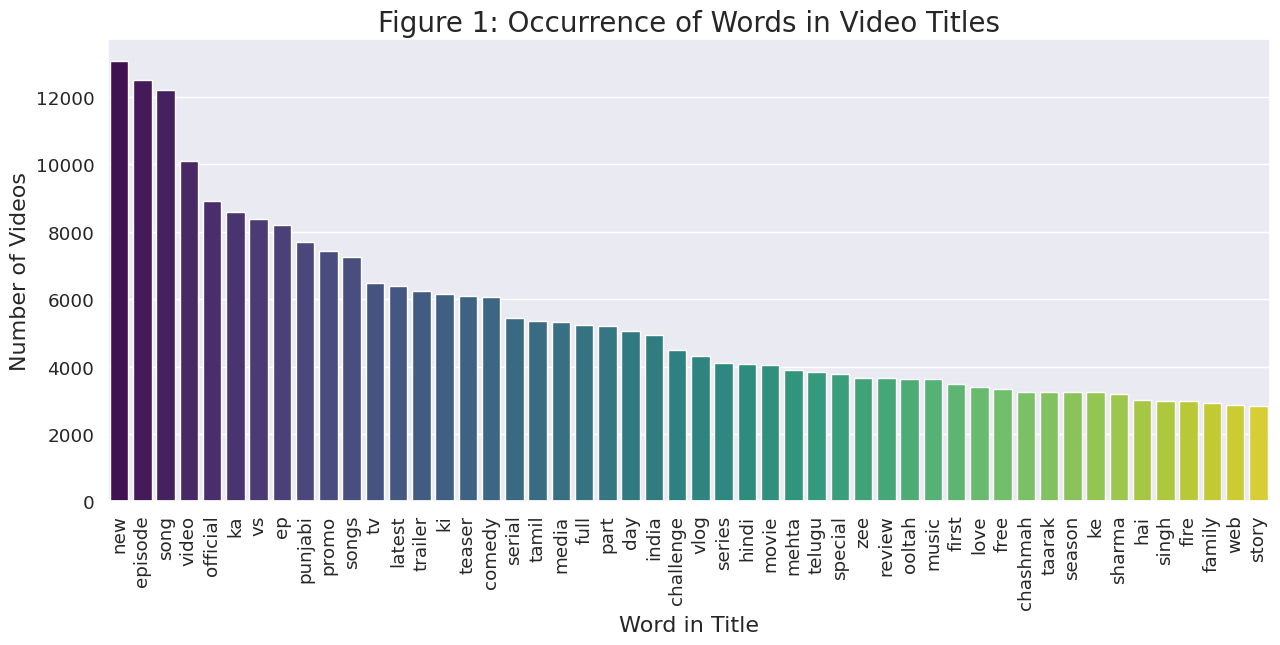

In [69]:
# Graphing number of times the world occure in title
fig= plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

sns.barplot(x=top_words,y=freqs, palette="viridis")

plt.xticks(rotation=90)
plt.xlabel('Word in Title', fontsize=16)
plt.ylabel('Number of Videos', fontsize=16)
plt.title('Figure 1: Occurrence of Words in Video Titles', fontsize=20)
plt.show()

From Figure 1, We can see that the top ten words are new, episode, song, video, official, ka, vs, ep, punjabi, promo.\
It seems that some words quict nicely go together like "new episode", "new song", "punjabi song", "official promo", "new ep", etc...

Video Categories

Now we will find what catagory of trending videos are most and least common by looking at the frequencies of video categories.

Tags Used

In [63]:
dfIN["tags"]

0         [sadak, sadak 2, mahesh bhatt, vishesh films, ...
1                                                  [[none]]
2         [clash diljit dosanjh, diljit dosanjh, diljit ...
3         [hindi songs, 2020 hindi songs, 2020 new songs...
4         [vyrl original, mohsin khan, shivangi joshi, p...
                                ...                        
223497    [dimple malhan vlogs, family vlogs, wanderer’s...
223498    [kairali tv, kairali tv live videos, kairali t...
223499    [nitish bhaluni, तारक मेहता, ooltah chashmah, ...
223500    [lakhneet vlogs, neetu bisht vlogs, sourav jos...
223501    [cinema express, cinema, indian express, cinem...
Name: tags, Length: 223502, dtype: object

In [ ]:
cnt = Counter()

# Finding the occurence of words in video titles
for title in dfIN['tags']:
    for token in title:
        cnt[token] += 1

# Finding the 50 most used words in video titles
dist = cnt.most_common(50)
top_words = []
freqs = []
common_words = []
for word, freq in dist:
    top_words.append(word)
    freqs.append(freq)

top_words.pop(0)
freqs.pop(0)

/home/pulkitd20/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pulkitd20/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pulkitd20/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pulkitd20/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pulkitd20/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.print_figure(byt

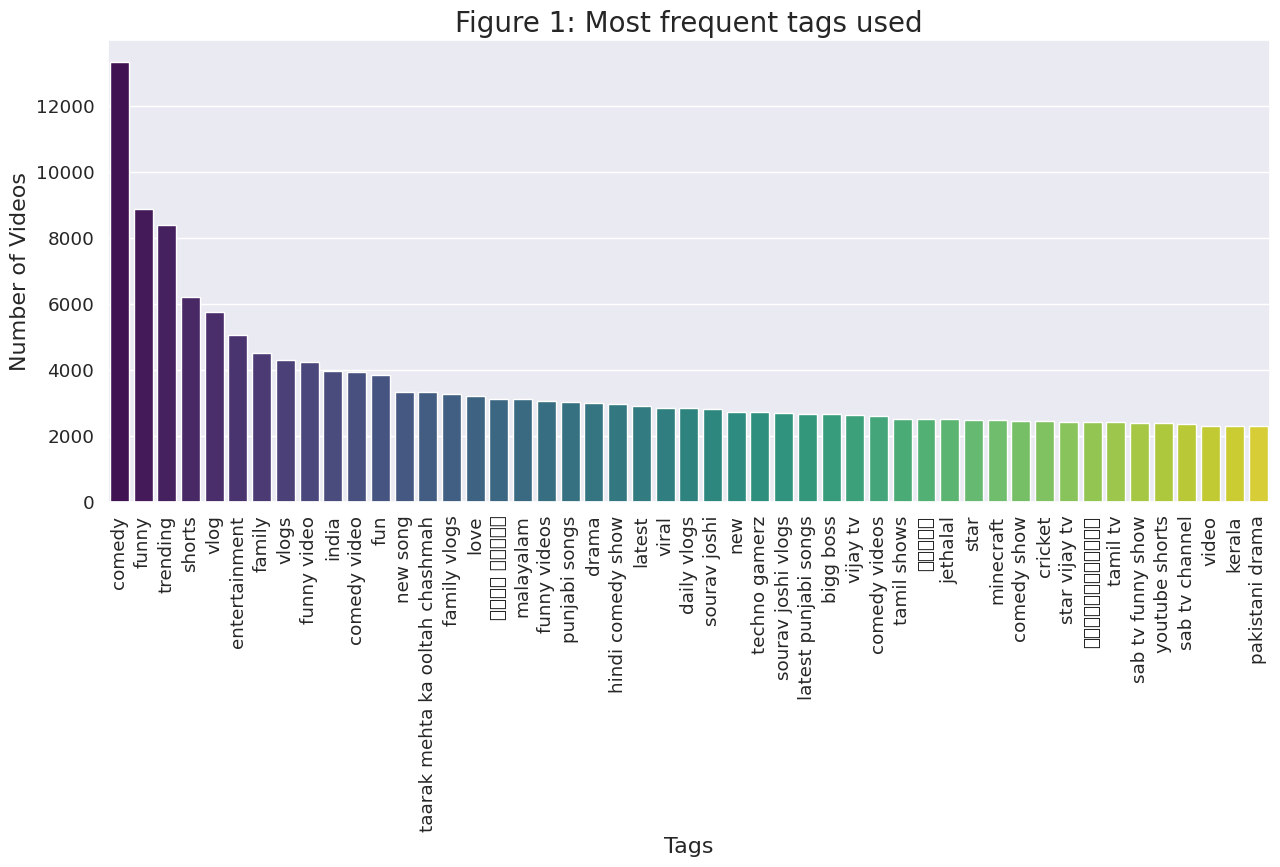

In [74]:
# Graphing number of times the world occure in title
fig= plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

sns.barplot(x=top_words,y=freqs, palette="viridis")

plt.xticks(rotation=90)
plt.xlabel('Tags', fontsize=16)
plt.ylabel('Number of Videos', fontsize=16)
plt.title('Figure 1: Most frequent tags used', fontsize=20)
plt.show()

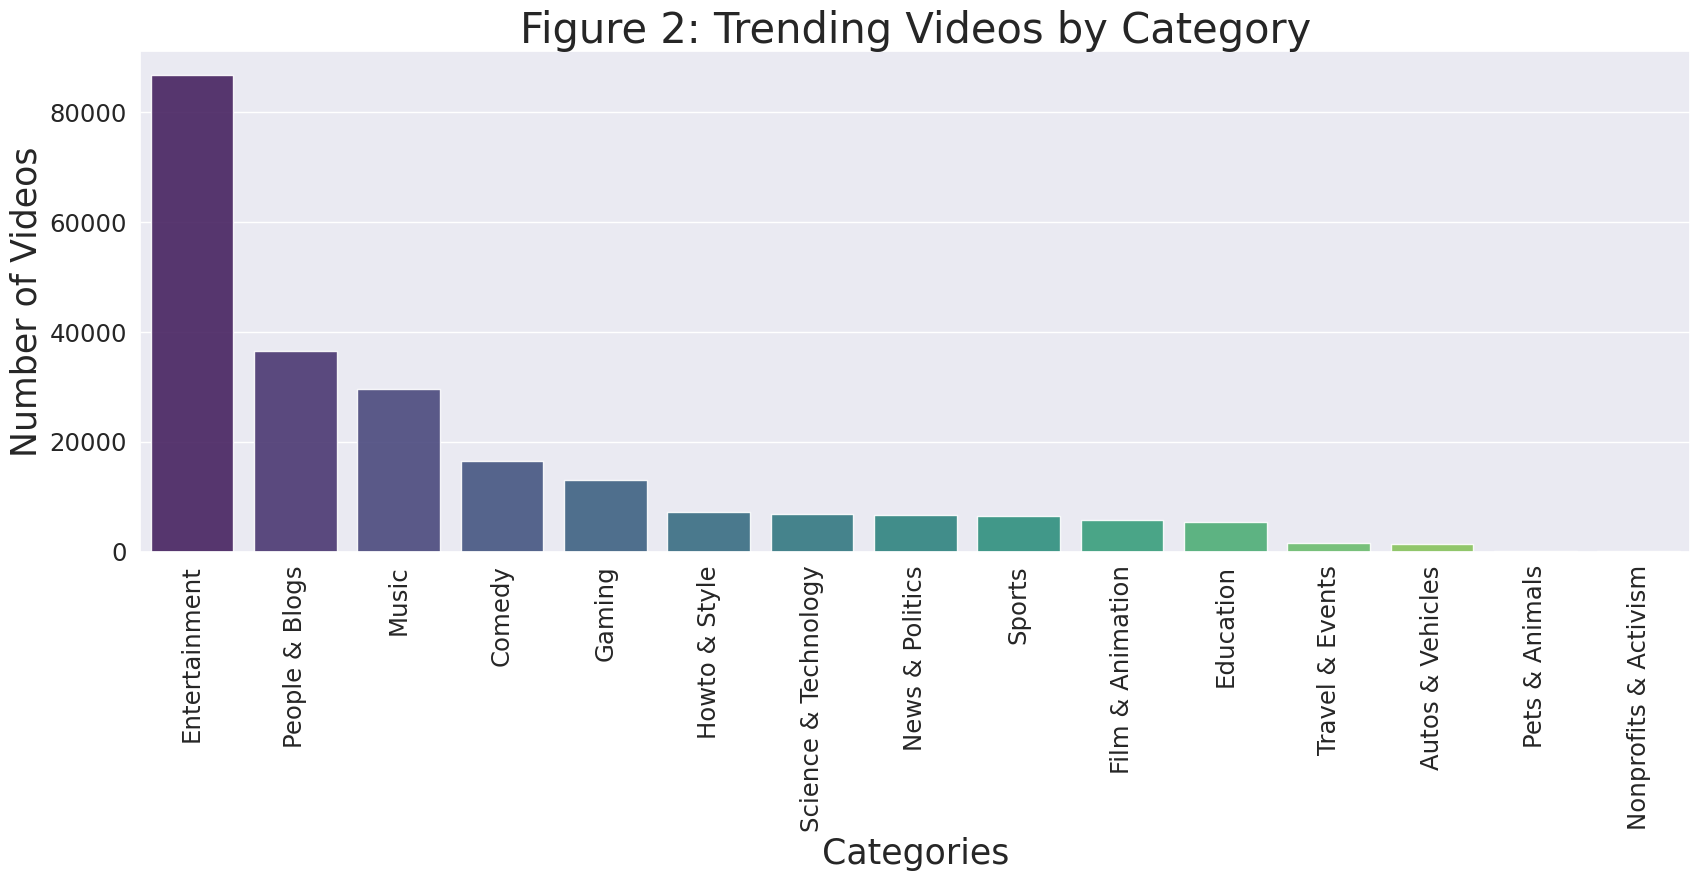

In [25]:
# Bar graph for number of videos per category
sns.set_style("darkgrid")
sns.set(font_scale=1.6)

categories = dfIN['categoryId'].value_counts()

plt.figure(figsize=(20,6.5))
sns.barplot(x=categories.index, y=categories.values, alpha=0.9, palette="viridis")

sns.set(font_scale=1.6)
plt.xticks(rotation=90)
plt.xlabel('Categories', fontsize=25)
plt.ylabel('Number of Videos', fontsize=25)
plt.title('Figure 2: Trending Videos by Category', fontsize=30)
plt.show()

From Figure 2, we can see that the Entertainment category has the most number of trending videos with about 85,000 in number and next three are People & Blogs, Music and Comedy

In [26]:
cat = categories.to_frame().reset_index()
most_used_categories = []
for i in range(15):
    most_used_categories.extend([cat['categoryId'][i] for j in range(cat['count'][i])])


To see the percentage of these four categories more acurately lets run the following code additionally lets see for the least 3 categories also.

In [27]:
# Caculating the percentages for top 4 categories
entertainment = dfIN[dfIN['categoryId'] == 'Entertainment']['categoryId'].count() / dfIN['categoryId'].count() * 100
blogs = dfIN[dfIN['categoryId'] == 'People & Blogs']['categoryId'].count() / dfIN['categoryId'].count() * 100
music = dfIN[dfIN['categoryId'] == 'Music']['categoryId'].count() / dfIN['categoryId'].count() * 100
comedy = dfIN[dfIN['categoryId'] == 'Comedy']['categoryId'].count() / dfIN['categoryId'].count() * 100

# Calculating the percentages for bottom 3 categories
travelandevents = dfIN[dfIN['categoryId'] == 'Travel & Events']['categoryId'].count() / dfIN['categoryId'].count() * 100
petsandanimals = dfIN[dfIN['categoryId'] == 'Pets & Animals']['categoryId'].count() / dfIN['categoryId'].count() * 100
nonprofits = dfIN[dfIN['categoryId'] == 'Nonprofits & Activism']['categoryId'].count() / dfIN['categoryId'].count() * 100

In [28]:
#Lets print the percentages
print("Top 4:")
print("Entertainment:",entertainment)
print("Blogs:",blogs)
print("Music:",music)
print("Comedy:",comedy)
print("\n")
print("Least 3:")
print("Travel & Events:",travelandevents)
print("Pets & Animals:",petsandanimals)
print("Nonprofits & Activism:",nonprofits)

Top 4:
Entertainment: 38.826050773594865
Blogs: 16.293813925602453
Music: 13.239255129708011
Comedy: 7.39948635806391


Least 3:
Travel & Events: 0.6787411298332902
Pets & Animals: 0.04921656182047588
Nonprofits & Activism: 0.035346439852887226


After doing the calculation for the percentages of categories, it is noteworthiy that Entertainment(38.82%), Blogs(16.29%), Music(13.23%), Comedy(7.39%) make up 75.73% of the trending videos. The common thing is that these type of videos are mostly leisure type except for sports.

Channel Frequencies

Now lets see which chanels have a large number of trending videos. Based on our previous catagory analysis, we can assume that the channels with the most number of trending videos will be Entertainment, Blogs, Music and Comedy. We can start by calculating the trending video frequency for each channel.

/home/pulkitd20/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pulkitd20/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pulkitd20/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pulkitd20/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pulkitd20/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from current font.
  fig.canvas.print_figure(by

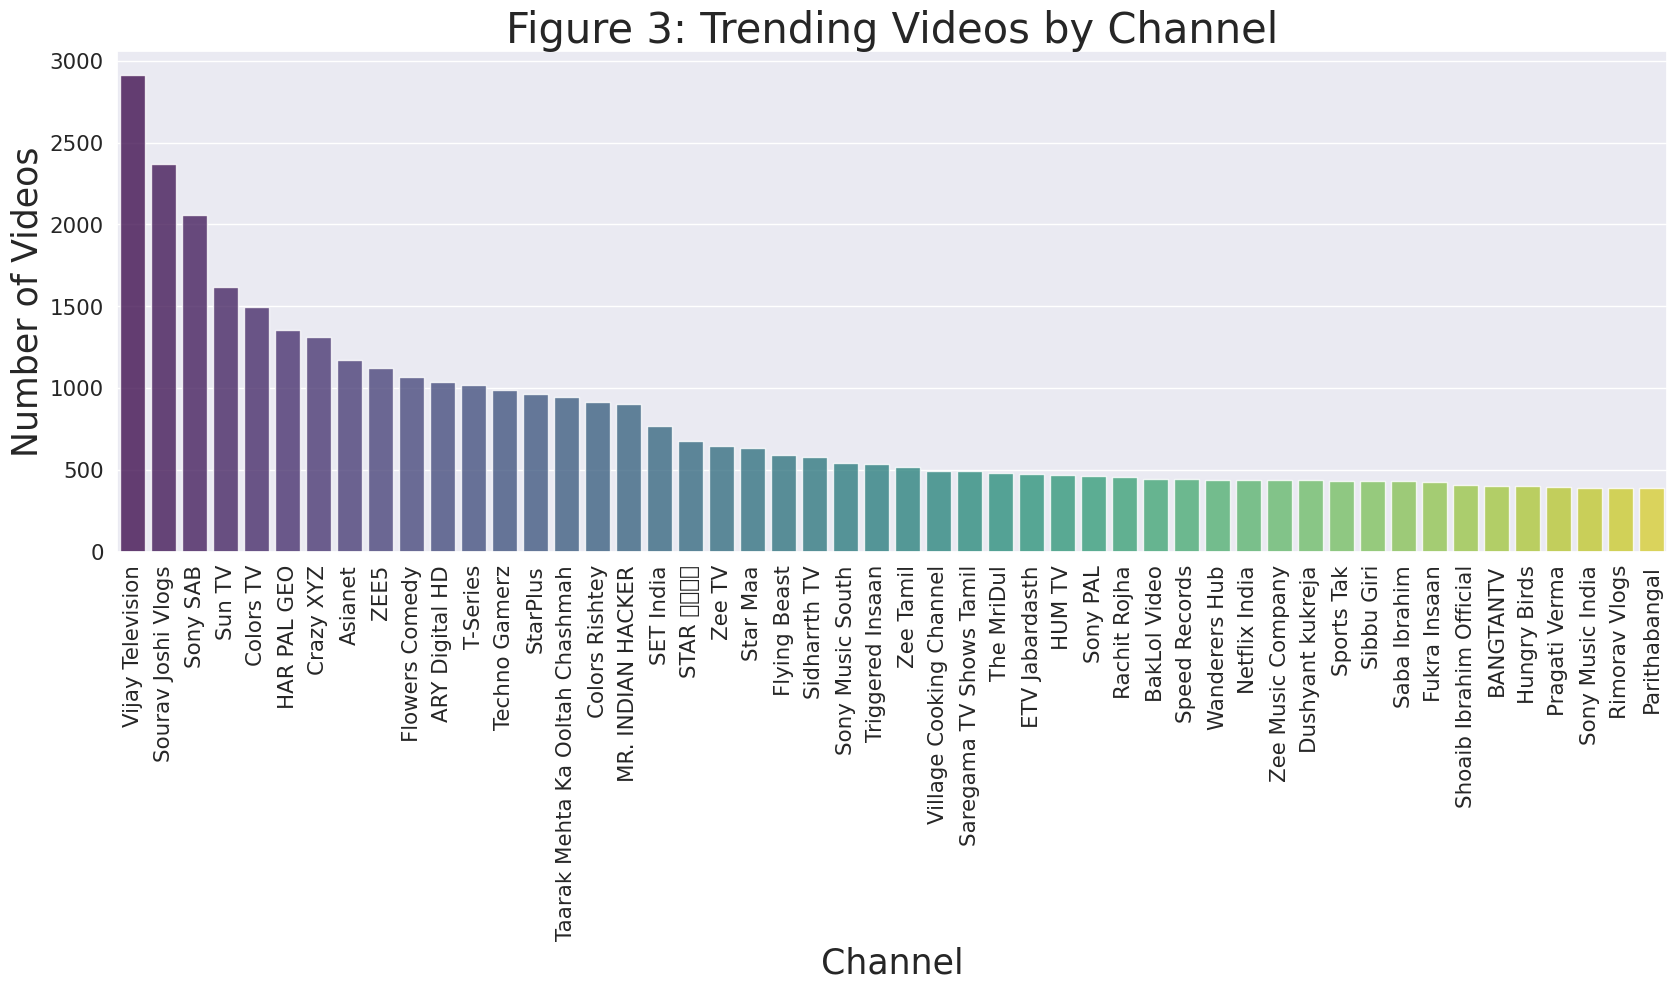

In [29]:
sns.set_style("darkgrid")
sns.set(font_scale=1.4)

channel_freq = dfIN['channelTitle'].value_counts()
channel_freq = channel_freq[0:50]

plt.figure(figsize=(20, 6.5))
sns.barplot(x=channel_freq.index, y=channel_freq.values, alpha=0.8, palette="viridis")

plt.xticks(rotation=90)
plt.xlabel('Channel', fontsize=25)
plt.ylabel('Number of Videos', fontsize=25)
plt.title('Figure 3: Trending Videos by Channel', fontsize=30)
plt.show()

Here is the top 10 chanels with trending videos and their respective Catagory.

Vijay Television: Entertainment\
Sourav Joshi Vlogs: Vlogs, Gaming\
Sony SAB: Comedy, Entertainment\
Sun TV: Entertainment\
Colors TV: Entertainment, Comedy\
HAR PAL GEO: Entertainment, Comedy\
Crazy XYZ: Entertainment, Comedy\
Asianet: Entertainment\
ZEE5: Entertainment, Music, Comedy\
Flowers Comedy: Comedy, Entertainment

In [30]:
channel_freq[0:10]

channelTitle
Vijay Television      2915
Sourav Joshi Vlogs    2367
Sony SAB              2057
Sun TV                1615
Colors TV             1496
HAR PAL GEO           1353
Crazy XYZ             1313
Asianet               1170
ZEE5                  1122
Flowers Comedy        1067
Name: count, dtype: int64

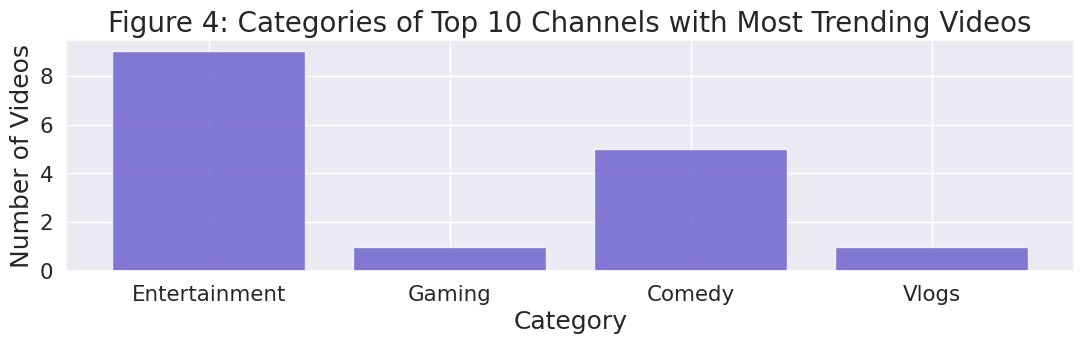

In [31]:
d = {'Entertainment': 9, 'Gaming': 1, 'Comedy': 5, 'Vlogs': 1}
# Bar graph for the number of videos per category for the top 10 channels with trending videos
plt.figure(figsize=(13,3))
plt.bar(range(len(d)), list(d.values()), align='center', alpha=0.8, 
        color="slateblue")
plt.xticks(range(len(d)), list(d.keys()))
plt.xlabel("Category", fontsize=18)
plt.ylabel("Number of Videos",fontsize=18)
plt.title('Figure 4: Categories of Top 10 Channels with Most Trending Videos', 
          fontsize=20)
plt.show()

Our earlier Exploration of the catagories suports the fact that almost 13% of the videos are Music but it seems like most of the channels are personal chanel so the content creators mostly vlog and in the other videos they produce music and when they make music they gets viral nad gets into trending page and the videos itself gets into Music catagory. So we will do another histogram for channel frequencies.

Text(0.5, 1.0, 'Figure 5: Frequency of Channels with Trending Videos')

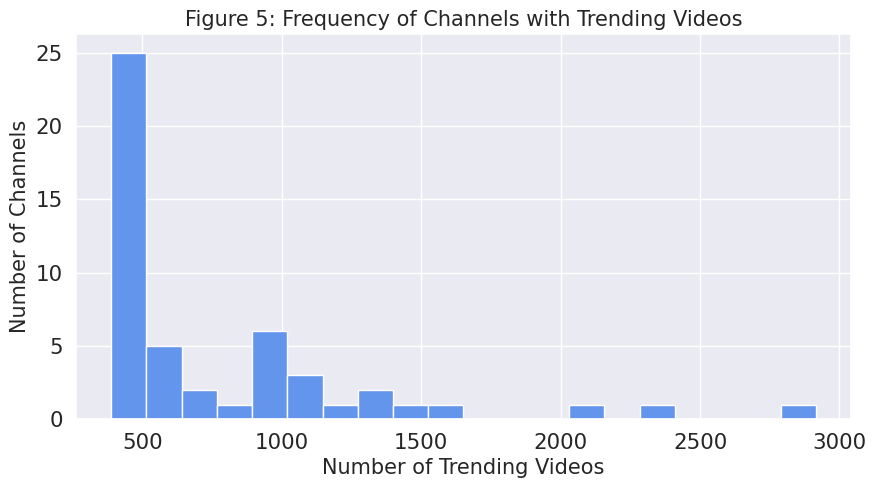

In [32]:
# Histogram for channel frequencies
plt.figure(figsize=(10,5))
channel_freq.hist(bins=20, color="cornflowerblue")
plt.xlabel("Number of Trending Videos", fontsize=15)
plt.ylabel("Number of Channels", fontsize=15)
plt.title('Figure 5: Frequency of Channels with Trending Videos', fontsize=15)

This hsitogram, Figure 5, helps us understand why the top 10 channels with trending videos may not match with the exploration of categories we did earlier as the distribution is extremely right skewed. Only 3 chanels have more than 1700 trending videos, while we have a few channels with over 1100 videos. We will calculate the percentages fo the number of trending videos that channels have to look at the distribution more closely.

In [33]:
# Percentage of number of trending videos a channel has
above_20 = len([i for i in channel_freq if i > 1700]) / len(channel_freq) * 100
percent_16_20 = len([i for i in channel_freq if (i <= 1700) & (i > 1100)]) / len(channel_freq) * 100
percent_11_15 = len([i for i in channel_freq if (i <= 1100) & (i > 900)]) / len(channel_freq) * 100
#percent_6_10 = len([i for i in channel_freq if (i <= 900) & (i > 700)]) / len(channel_freq) * 100
percent_1_5 = len([i for i in channel_freq if (i <= 900)]) / len(channel_freq) * 100

In [34]:
#Lets print the percentages
print("Above 1700:",above_20)
print("Between 1700 to 1100:",percent_16_20)
print("Between 1100 to 900:",percent_11_15)
print("Between 900 and bellow:",percent_1_5)

Above 1700: 6.0
Between 1700 to 1100: 12.0
Between 1100 to 900: 14.000000000000002
Between 900 and bellow: 68.0


This shows us that the top channels with over 1700 trending videos are outliers.

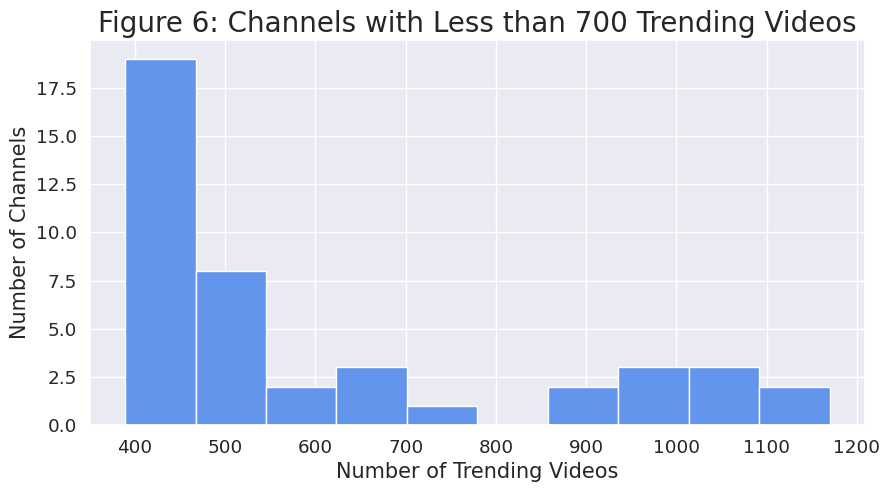

In [35]:
# Histogram for number of channels vs number of trending videos below 20
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

plt.figure(figsize=(10, 5))
channel_freq[channel_freq<1200].hist(bins=10, color='cornflowerblue')

plt.xlabel("Number of Trending Videos", fontsize=15)
plt.ylabel("Number of Channels", fontsize=15)
plt.title("Figure 6: Channels with Less than 700 Trending Videos", fontsize=20)

plt.show()


Exploration of Views

In [36]:
dfIN.describe()

,view_count,likes,dislikes,comment_count,trending_year
count,2.235020e+05,2.235020e+05,2.235020e+05,2.235020e+05,223502.000000
mean,2.885734e+06,1.462197e+05,2.623205e+03,8.746049e+03,2021.701144
std,7.077114e+06,4.044621e+05,7.633705e+04,7.407852e+04,0.971279
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2020.000000
25%,3.992128e+05,1.332800e+04,0.000000e+00,3.640000e+02,2021.000000
50%,9.917075e+05,4.016300e+04,0.000000e+00,1.190000e+03,2022.000000
75%,2.526285e+06,1.237568e+05,9.550000e+02,4.180750e+03,2023.000000
max,2.644074e+08,1.611524e+07,1.234147e+07,6.738565e+06,2023.000000


In [37]:
dfIN.median(numeric_only=True)

view_count           991707.5
likes                 40163.0
dislikes                  0.0
comment_count          1190.0
comments_disabled         0.0
ratings_disabled          0.0
trending_year          2022.0
dtype: float64

Average number of views: 2885734\
Median number of views: 991707\
With the average being so much larger than the median, this tells that the distribution of views is strongly skewed to the right.

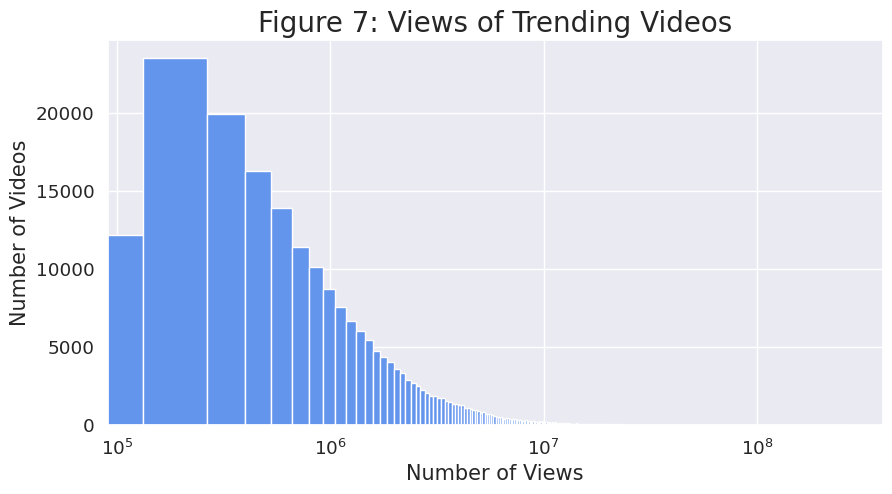

In [38]:
# Histogram of the views data for all the videos
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

plt.figure(figsize=(10, 5))
v1 = dfIN['view_count'].hist(bins=2000, color='cornflowerblue')

plt.xscale('log') # Set x-axis to logarithmic scale
plt.xlabel('Number of Views', fontsize=15)
plt.ylabel('Number of Videos', fontsize=15)
plt.title('Figure 7: Views of Trending Videos', fontsize=20)

plt.show()

Figure 7 shows that the distribution is very right skewed and shows us that the majority of videos under million. We will plot another histogram to look at the distribution a little bit closer.

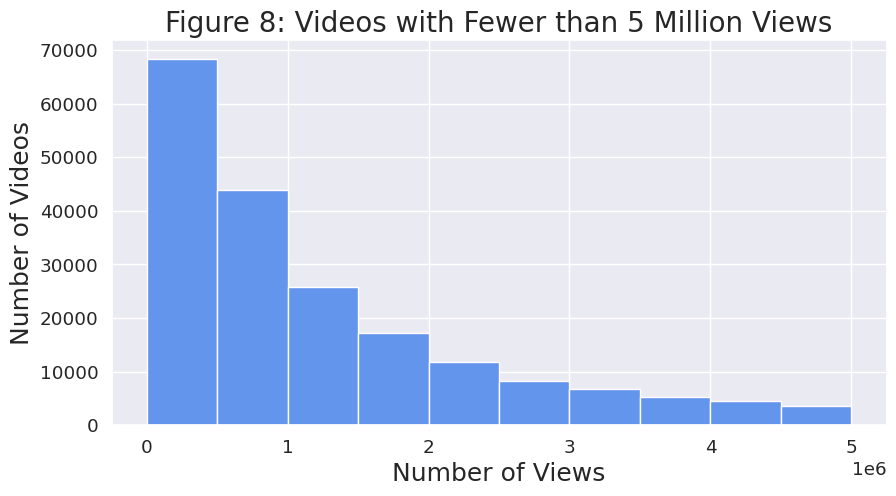

In [39]:
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

v5million = dfIN[dfIN['view_count'] < 5e6]['view_count']

plt.figure(figsize=(10, 5))
v2 = v5million.hist(color='cornflowerblue')

plt.xlabel('Number of Views', fontsize=18)
plt.ylabel('Number of Videos', fontsize=18)
plt.title('Figure 8: Videos with Fewer than 5 Million Views', fontsize=20)

plt.show()

Now it is easy to see that the majority of videos have under 5 million views. We will calculate the exact percentage below.

In [40]:
views_2 = dfIN[dfIN['view_count'] < 5e6]['view_count'].count() / dfIN['view_count'].count() * 100
views_1 = dfIN[dfIN['view_count'] < 1e6]['view_count'].count() / dfIN['view_count'].count() * 100

print("% videos with under 5 million views: ", views_2)
print("% videos with under 1 million views: ", views_1)

% videos with under 5 million views:  87.53836654705552
% videos with under 1 million views:  50.243398269366715


Exploration of Likes

Average number of likes: 146219\
Median number of likes: 40163

This tells us that the distribution of views is strongly skewed to the right, with the majority of videos having below 40,613 likes.\
To visualize the data we will create a histogram of the like data for all the videos.

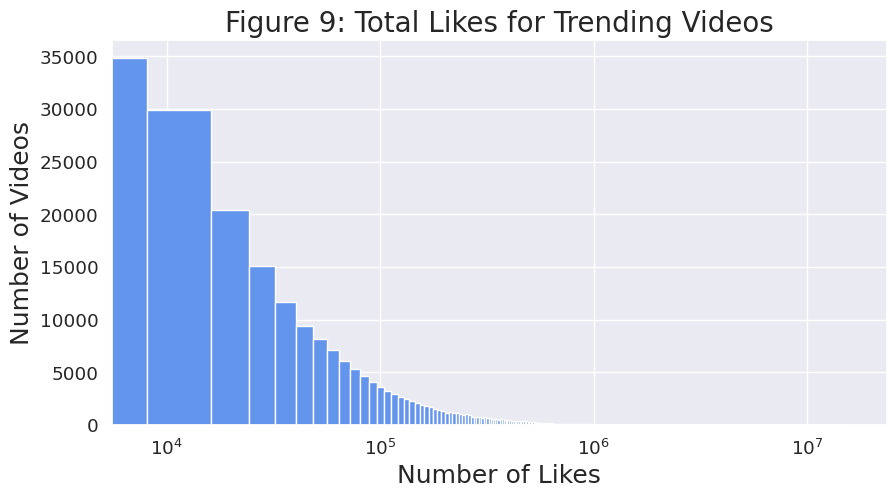

In [41]:
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

plt.figure(figsize=(10, 5))
l1 = dfIN['likes'].hist(bins=2000, color='cornflowerblue')

plt.xscale('log')
plt.xlabel('Number of Likes', fontsize=18)
plt.ylabel('Number of Videos', fontsize=18)
plt.title('Figure 9: Total Likes for Trending Videos', fontsize=20)

plt.show()

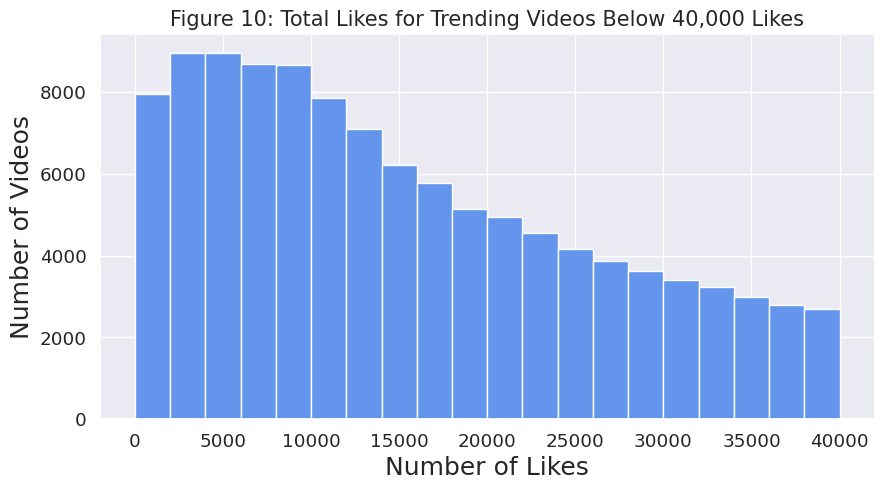

In [42]:
# Subset of likes below 40,000
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

below40000 = dfIN[dfIN['likes'] < 4e4]['likes']

plt.figure(figsize=(10, 5))
l2 = below40000.hist(bins=20, color='cornflowerblue')

plt.xlabel('Number of Likes', fontsize=18)
plt.ylabel('Number of Videos', fontsize=18)
plt.title('Figure 10: Total Likes for Trending Videos Below 40,000 Likes', fontsize=15)

plt.show()

In [43]:
# Finding max number of likes
print("max number of likes: ", dfIN['likes'].max())

# Finding min number of likes; excluding videos with 0 likes as those are for videos with ratings disabled
nonzero = dfIN[dfIN['likes'] != 0]
print("min number of likes: ", nonzero['likes'].min())
print()

max number of likes:  16115240
min number of likes:  33



In [44]:
# Drop duplicates based on other columns (e.g., 'title')
unique_df = dfIN.drop_duplicates(subset='title')

# Sort the unique DataFrame based on 'likes' column in descending order
sorted_unique_df = unique_df.sort_values(by='likes', ascending=False)

# Print the titles and like counts of the top videos
print("Titles and Like Counts of the Most Liked Trending Videos (No Duplicates):")
for index, row in sorted_unique_df.head(n=10).iterrows():
    print("Title:", row['title'])
    print("Likes:", row['likes'])
    print("------")

Titles and Like Counts of the Most Liked Trending Videos (No Duplicates):
Title: BTS (방탄소년단) 'Butter' Official MV
Likes: 7110166
------
Title: BTS (방탄소년단) 'Dynamite' Official MV
Likes: 7046197
------
Title: BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V
Likes: 5913017
------
Title: BTS (방탄소년단) 'Life Goes On' Official MV
Likes: 5178144
------
Title: BLACKPINK – ‘Lovesick Girls’ M/V
Likes: 4746462
------
Title: BTS (방탄소년단) 'Butter' Official MV (Hotter Remix)
Likes: 4731050
------
Title: BTS (방탄소년단) 'Permission to Dance' Official MV
Likes: 4673542
------
Title: BTS (방탄소년단) 'Film out' Official MV
Likes: 4581220
------
Title: KGF Chapter2 TEASER |Yash|Sanjay Dutt|Raveena Tandon|Srinidhi Shetty|Prashanth Neel|Vijay Kiragandur
Likes: 4376290
------
Title: PSY - 'That That (prod. & feat. SUGA of BTS)' MV
Likes: 4309911
------


In [45]:
dfIN["publishing_day"] = dfIN["publishedAt"].apply(
    lambda x: x.strftime('%a'))

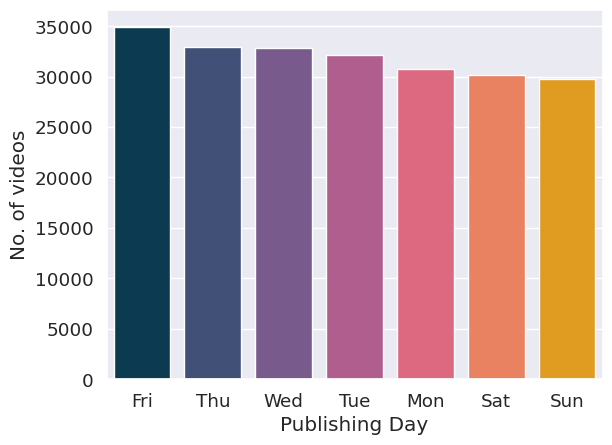

In [46]:
cdf = dfIN["publishing_day"].value_counts().to_frame().reset_index()
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="count", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")


Question 1: What are the frequent words used in titles?

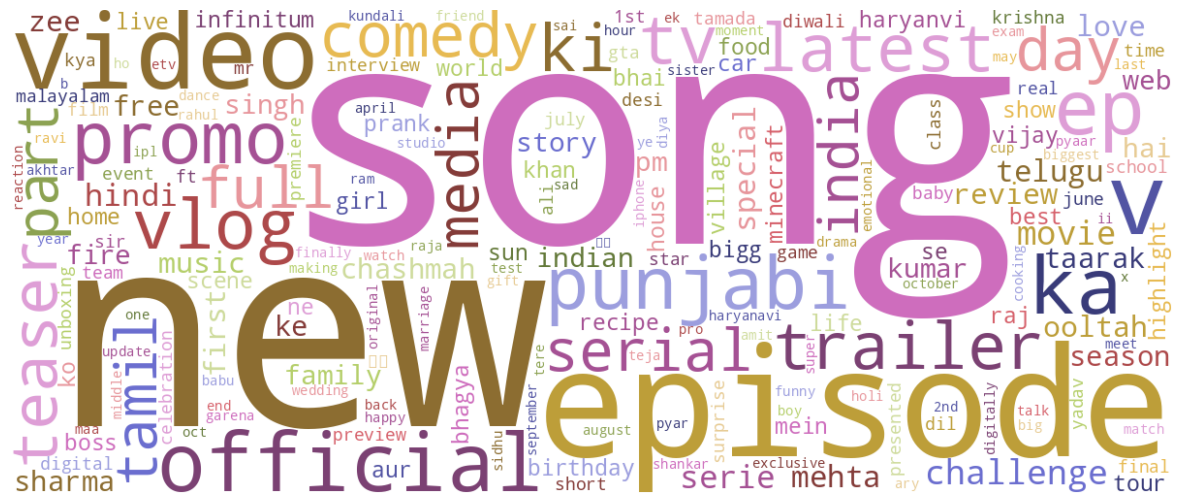

In [47]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(common_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

/home/pulkitd20/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pulkitd20/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pulkitd20/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pulkitd20/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pulkitd20/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from current font.
  fig.canvas.print_figure(by

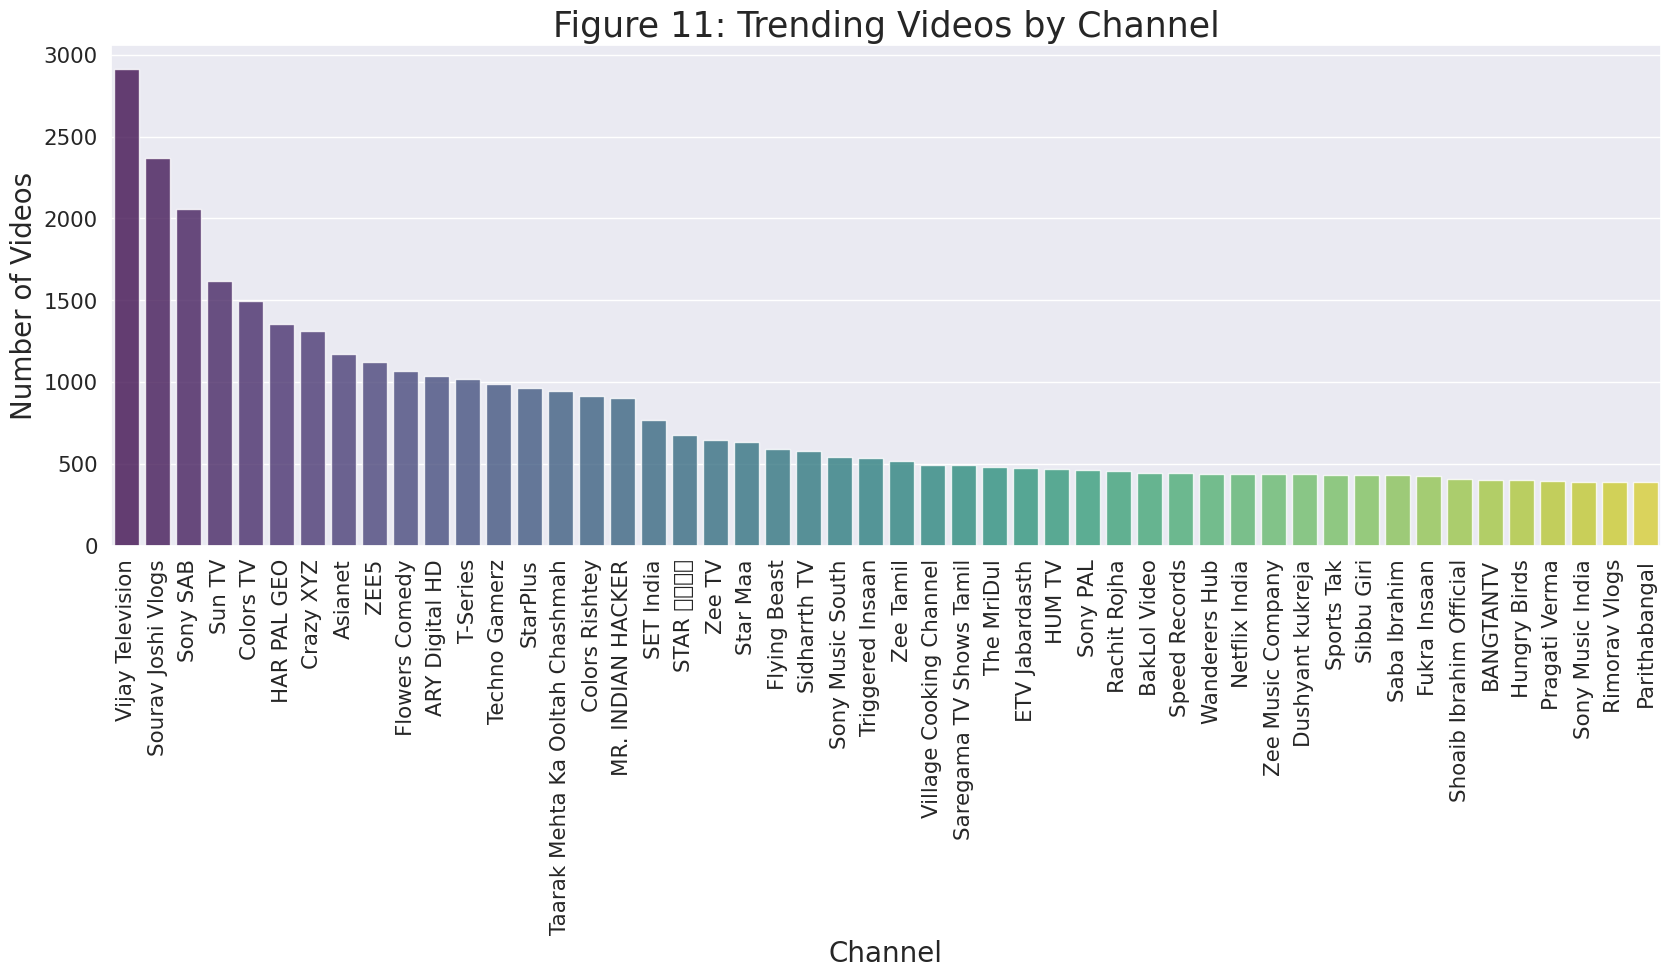

In [48]:
sns.set_style("darkgrid")
sns.set(font_scale=1.4)

channel_freq = dfIN['channelTitle'].value_counts()
channel_freq = channel_freq[0:50]

plt.figure(figsize=(20, 6.5))
sns.barplot(x=channel_freq.index, y=channel_freq.values, alpha=0.8, palette="viridis")

plt.xticks(rotation=90)
plt.xlabel('Channel', fontsize=20)
plt.ylabel('Number of Videos', fontsize=20)
plt.title('Figure 11: Trending Videos by Channel', fontsize=25)
plt.show()

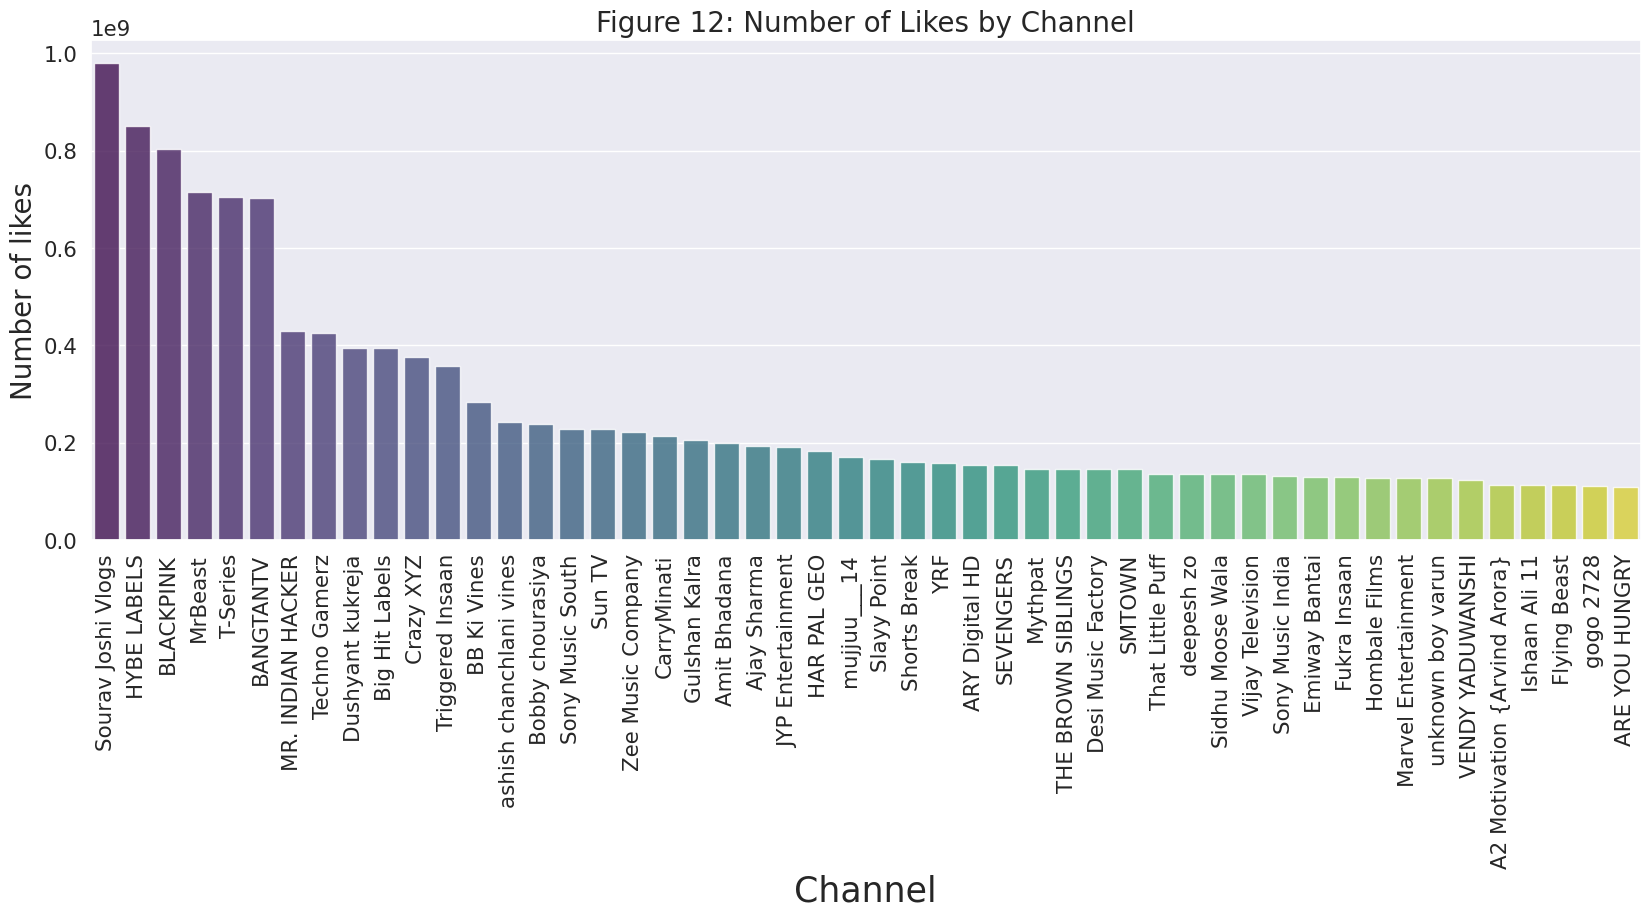

In [49]:
likes_freq = dfIN.groupby('channelTitle')['likes'].sum().reset_index()
likes_freq = likes_freq.sort_values(by = 'likes', ascending=False)
likes_freq = likes_freq[:50]
plt.figure(figsize=(20, 6.5))
sns.barplot(x=likes_freq.channelTitle, y=likes_freq.likes, alpha=0.8, palette="viridis")

plt.xticks(rotation=90)
plt.xlabel('Channel', fontsize=25)
plt.ylabel('Number of likes', fontsize=20)
plt.title('Figure 12: Number of Likes by Channel', fontsize=20)
plt.show()

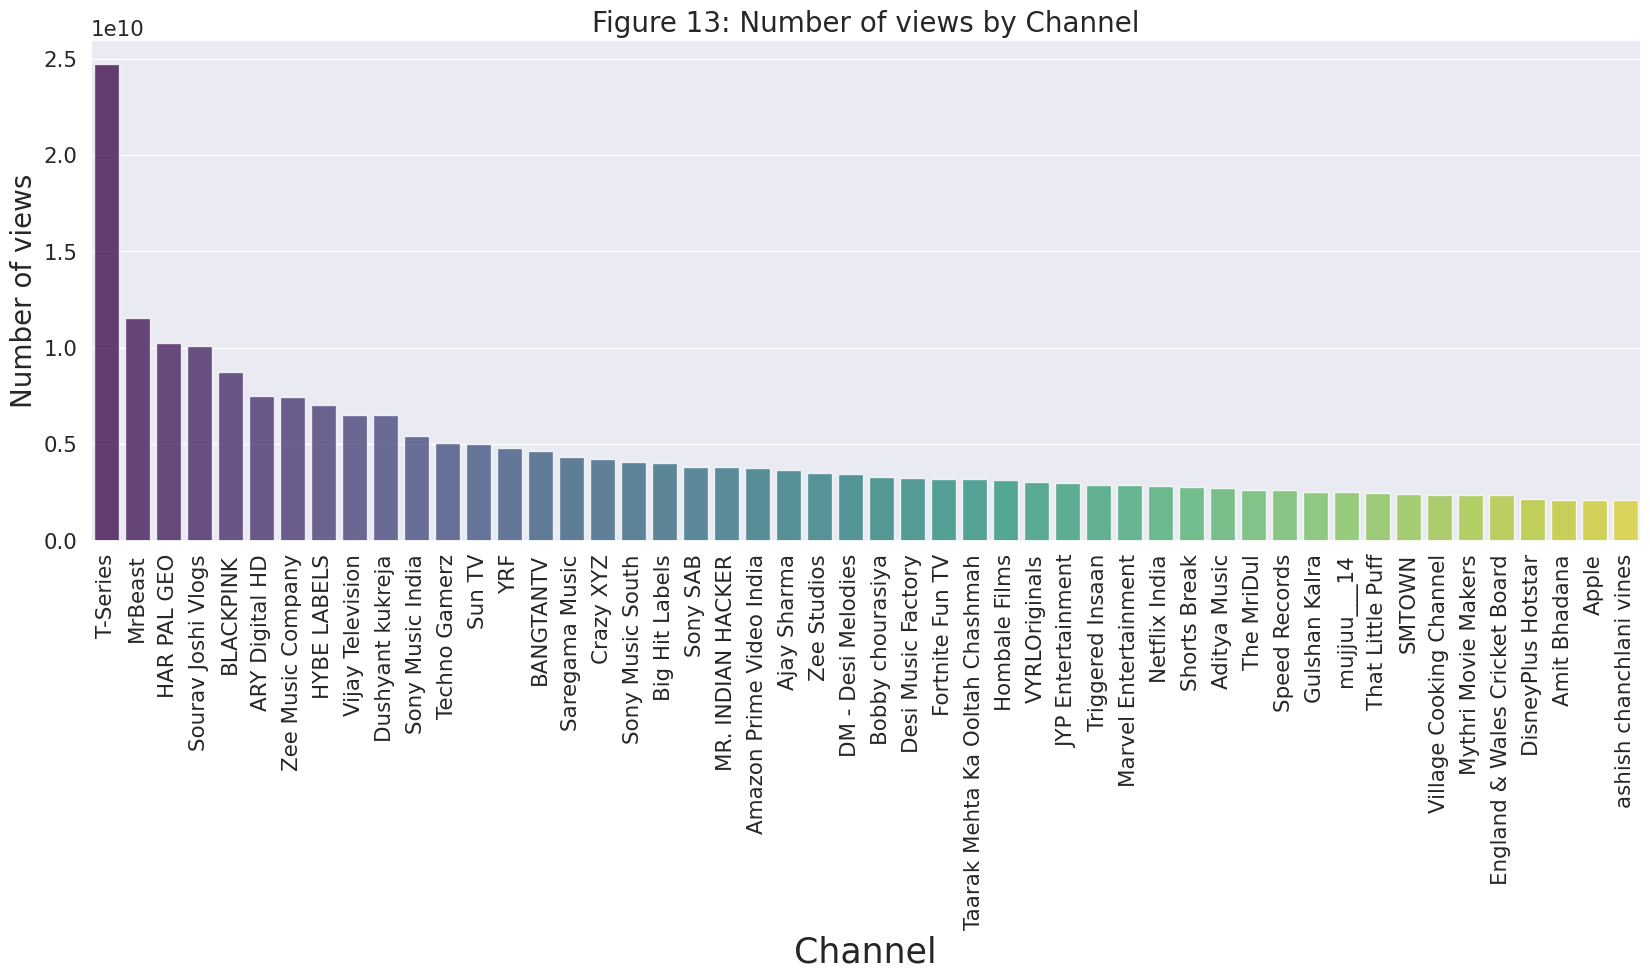

In [50]:
views_freq = dfIN.groupby('channelTitle')['view_count'].sum().reset_index()
views_freq = views_freq.sort_values(by = 'view_count', ascending=False)
views_freq = views_freq[:50]
plt.figure(figsize=(20, 6.5))
sns.barplot(x=views_freq.channelTitle, y=views_freq.view_count, alpha=0.8, palette="viridis")

plt.xticks(rotation=90)
plt.xlabel('Channel', fontsize=25)
plt.ylabel('Number of views', fontsize=20)
plt.title('Figure 13: Number of views by Channel', fontsize=20)
plt.show()

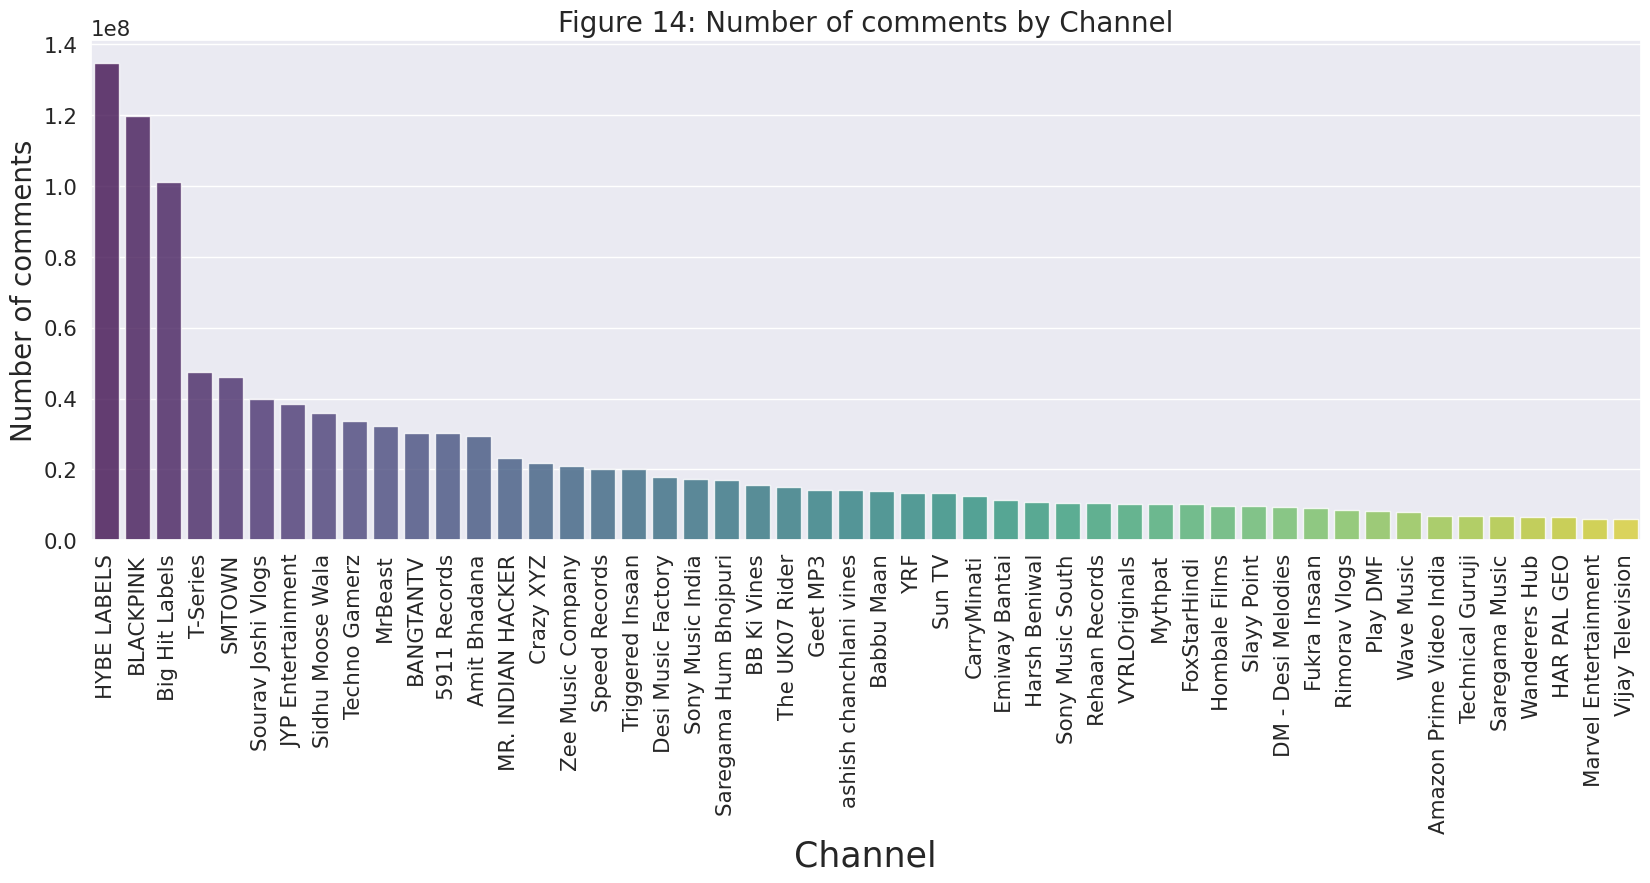

In [51]:
comment_freq = dfIN.groupby('channelTitle')['comment_count'].sum().reset_index()
comment_freq = comment_freq.sort_values(by = 'comment_count', ascending=False)
comment_freq = comment_freq[:50]
plt.figure(figsize=(20, 6.5))
sns.barplot(x=comment_freq.channelTitle, y=comment_freq.comment_count, alpha=0.8, palette="viridis")

plt.xticks(rotation=90)
plt.xlabel('Channel', fontsize=25)
plt.ylabel('Number of comments', fontsize=20)
plt.title('Figure 14: Number of comments by Channel', fontsize=20)
plt.show()